# Исследование объявлений о продаже квартир

В распоряжении представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Целью работы является определение зависимых параметров для возможности предиктивного вычисления рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. К первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-исходных-данных" data-toc-modified-id="Загрузка-исходных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка исходных данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-данных" data-toc-modified-id="Пропуски-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропуски в данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li><li><span><a href="#Устранение-аномалий" data-toc-modified-id="Устранение-аномалий-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устранение аномалий</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-гистограмм" data-toc-modified-id="Анализ-гистограмм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ гистограмм</a></span></li><li><span><a href="#Анализ-скорости-продажи" data-toc-modified-id="Анализ-скорости-продажи-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ скорости продажи</a></span></li><li><span><a href="#Анализ-влияния-факторов-на-стоимость-объекта" data-toc-modified-id="Анализ-влияния-факторов-на-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ влияния факторов на стоимость объекта</a></span></li><li><span><a href="#Оценка-средней-стоимости-квадратного-метра" data-toc-modified-id="Оценка-средней-стоимости-квадратного-метра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оценка средней стоимости квадратного метра</a></span></li><li><span><a href="#Доп.-анализ-стоимости-квадратного-метра" data-toc-modified-id="Доп.-анализ-стоимости-квадратного-метра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Доп. анализ стоимости квадратного метра</a></span></li><li><span><a href="#Оценка-стоимости-в-зависимости-от-удаленности-от-центра" data-toc-modified-id="Оценка-стоимости-в-зависимости-от-удаленности-от-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Оценка стоимости в зависимости от удаленности от центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Откройте файл с данными и изучите общую информацию. 

#### Загрузка исходных данных

In [6]:
#  Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter("ignore")

In [7]:
#  Загрузка датасета с локального ПК и с платформы Яндекс Практикума
try:
    data = pd.read_csv('D:\Учеба\Аналитик данных\Проект 3\data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [8]:
#  Выведем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div style="border:solid Green 2px; padding: 20px">
Датафрейм представлен 23699 строками на 22 столбца.
    
Порядка 60% столбцов имеют пропущенные значения.
    
Необходимо скорректировать тип данных по следующим столбцам:
    
1) **first_day_exposition: object в DateTime**
    
2) **is_apartment: object в bool** (скорее всего большое количество пропусков связано с отсутствием значения 0 - False и автоматическому присвоению NaN данным ячейкам)

In [9]:
#  Выведем 20 первых строк для ознакомления со структурой данных
data.head(20)

#  Увеличим максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)

In [10]:
#  Выведем основную описательную статистику по датасету
data.describe().applymap("{:.2f}".format)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<div style="border:solid Green 2px; padding: 20px">
В данных видны нетипичные значения: <br/>
       
Большой разброс, аномальные крайние значения в столбцах, которые выглядят нереалистично - 19 комнат, площадь 900 м2, высота потолка от 1 до 100 метров и тд.
    
По части значений можно предположить о наличии уникальных объектов недвижимости, однако некоторые показатели не поддаются объяснению.

';'

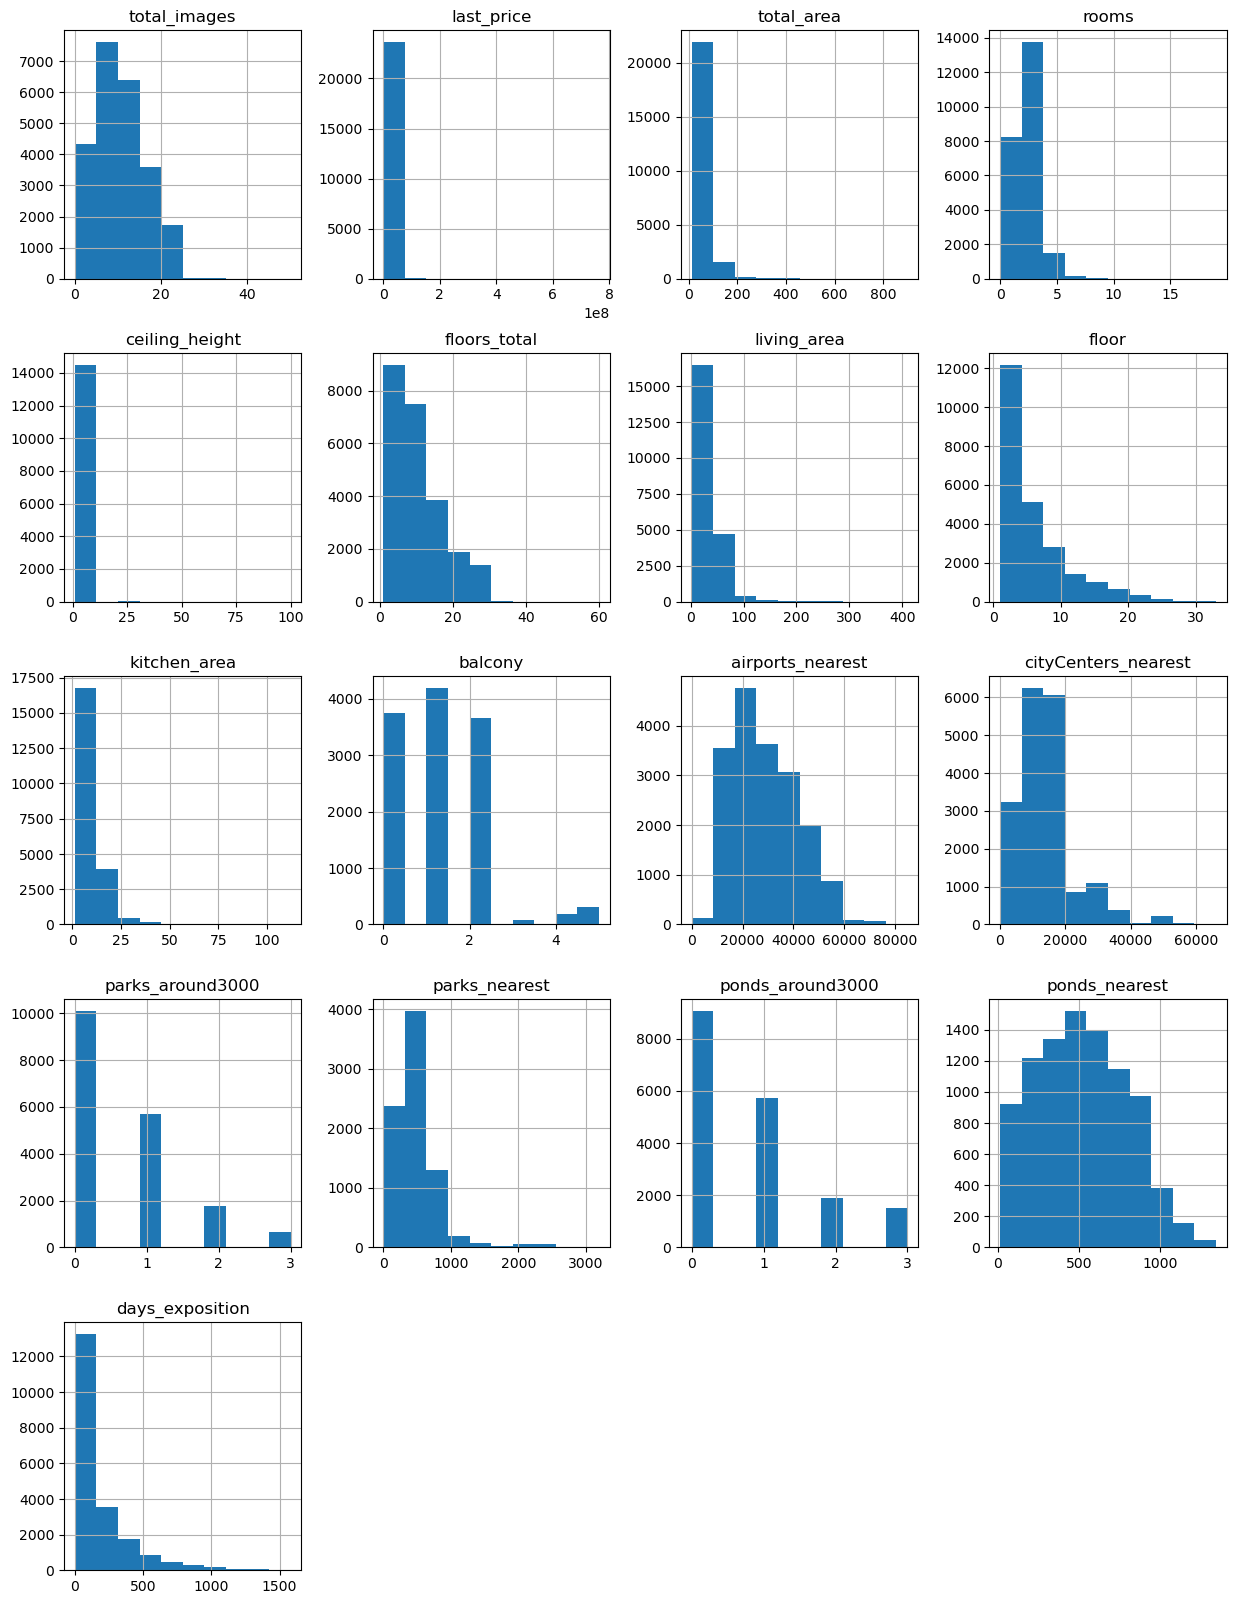

In [11]:
#  Строим гистограммы для числовых столбцов датасета
data.hist(figsize=(15, 20))
';'

<div style="border:solid Green 2px; padding: 20px">
Часть гистограмм имеют логичное нормальное распределение. <br/>
    
Некоторые гистограммы имеют непоказательное строение по умолчанию - цена, общая площадь, высота потолка и другие гистограммы требуют донастройки по количеству корзин или лимитов по оси Х, чтобы увидеть действительную картину.

In [12]:
# Выведем матрицу корреляции, чтобы определить наиболее зависимые величины
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


<div style="border:solid Green 2px; padding: 20px">
    
По данной матрице можно определить перспективные зависимости для дальнейшего анализа и предопбработки данных. Например отмечается высокая линейная зависимость между жилой и общей площадью.

### Предобработка данных

#### Пропуски в данных

In [13]:
#  Определяем количество пропусков в столбцах датасета
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div style="border:solid Green 2px; padding: 20px">
Столбцов с пропусками много. И самих пропусков в столбцах тоже большое количество.<br/>
Попробуем разобраться с каждым столбцом - возможные причины отсутствия данных и возможность восстановления информации:
    
**1. ceiling_height, floors_total, living_area, kitchen_area** - большая группа, которая схожа по своим характеристикам. Данные в этих столбцах явно заполняются пользователем. Поэтому нельзя исключать человеческий фактор - объявление может быть добавлено риэлтором, который не знает подробности о высоте потолков, количестве этажей и тд. В дальнейшем заполнить данную информацию можно попробовать значениями, в случае наличия взаимосвязи с другой категорией.
    
    
**2. is_apartment,  balcony** - вторая группа данных, которая также относится к категории, заполняемой пользователем. Однако в данном случае можно предположить, что пропущенные значения это 0 - отсутствие балкона, и квартира не является апартаментами.
    
    
**3. locality_name** - информация о названии района. Возможно пропущено пользователем, либо выбранный вариант пользователем отсутствует в базе данных для отображения. Можно попробовать найти взаимосвязь с удаленностью от аэропорта и другим показателям и заполнить пропуски.
    
    
**4. airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000** - данная группа относится к категории, которая заполняется автоматически. Количество пропусков в каждом столбце довольно близко друг к другу - около 5500 шт. Рассмотрев первые строки датафрейма можно предположить о том, что функция автоматического расчета количества и расстояния не работает в части населенных пунктов. К примеру в городском посёлоке Янино-1 пропуски во всех столбцах. **В данном случае заполнить пропуски не получится.**
    
    
**5. parks_nearest, ponds_nearest** - очень большое количество пропусков в данных, которые должны были быть заполнены системой. Вероятнее всего, пропуски наблюдаются в тех объектах, где расстояние до парка или пруда слишком велико - превышает установленное значение (на основании максимума для парка можно предположить о расстоянии в 3500 метров). **В данном случае заполнить пропуски не получится.**
    
    
**6. days_exposition** - последнее значение, количество дней публикации. Можно предположить о том, что данные объявления все еще опубликованы и не сняты. **На текущем этапе данные пропуски пока можно оставить.**

In [14]:
#  Для столбца living_area можно вывести уравнение линейной регресси, так как высокий коэффициент корреляции с total_area

data_na = data.dropna(subset = ['total_area', 'living_area'])  # Удаляем строки с пропусками
np.polyfit(data_na['total_area'],data_na['living_area'],1)  # Получаем коэффициенты а и b для уравнения линейной регрессии

array([ 0.59649376, -1.38500531])

In [15]:
#  Выполним алгоритм для заполнения пропусков
data['area_helps'] = -1.38500531 + 0.59649376 * data['total_area']  # Создадим вспомогательный столбец с данными из уравнения
data['living_area'] = data['living_area'].fillna(data['area_helps']) # Заполним пропуски из вспомогательного столбца
data = data.drop('area_helps', axis = 1)  # Удаляем вспомогтаельный столбец

In [16]:
#  Для столбца kitchen_area повторим алгоритм выше
data_na = data.dropna(subset = ['total_area', 'kitchen_area'])
np.polyfit(data_na['total_area'],data_na['kitchen_area'],1)

array([0.10268189, 4.33189405])

In [17]:
data['area_helps'] = 4.33189405 + 0.10268189 * data['total_area']  # Создадим вспомогательный столбец с данными из уравнения
data['kitchen_area'] = data['kitchen_area'].fillna(data['area_helps']) # Заполним пропуски из вспомогательного столбца
data = data.drop('area_helps', axis = 1)  # Удаляем вспомогтаельный столбец

In [18]:
#  Проверяем значения в столбце is_apartment
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [19]:
#  Заполняем пропуски значением "False" и выполняем проверку
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [20]:
#  Проверяем значения в столбце balcony
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [21]:
#  Заполняем пропуски значением "0" и выполняем проверку
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [22]:
#  Количество пропущенных значений в столбце с названием поселка небольшое, предварительно заполним значением "Unknown"
data['locality_name'] = data['locality_name'].fillna('unknown')

In [23]:
#  Столбец floors_total можно заполнить медианными значениями в зависимости от этажа квартиры
for floors in data['floor'].unique():
    data.loc[(data['floors_total'].isna()) & (data['floor'] == floors), 'floors_total'] =\
    data.loc[data['floor'] == floors, 'floors_total'].median()

In [24]:
#  Проверка количества пропусков после заполнения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div style="border:solid Green 2px; padding: 20px">
    
    
**Вывод:** Остался столбец с пропусками, предположительно, по вине пользователя - не знание данных или невнимательность при заполнении, и 7 столбцов с данными, заполняемыми системой. Часть из них не заполняется, предположительно, в конкретных поселках, а часть из-за ограничения по расстоянию. И пропуски в последнем столбце означают действующее объявление. 

#### Изменение типов данных

<div style="border:solid Green 2px; padding: 20px">
    
На этапе знакомства с данными были определены 2 столбца, которые требуют изменения типа данных:
    
    first_day_exposition: object в DateTime

    is_apartment: object в bool 
    
Также следует перевести группу данных из типа float в тип int, ввиду их целочисленных значений:   
    
    floors_total, balcony, parks_around3000, ponds_around3000, days_exposition (ввиду наличия пропусков на данном этапе изменить тип данных возможно только в столбцах balcony и floors_total)

In [25]:
#  Изменение типа данных в столбце first_day_exposition: object в DateTime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y%m%dT')  #  Убираем нулевое значение времени

In [26]:
#  Изменение типа данных в столбцах floors_total и balcony: float в int и столбце is_apartment: object в bool 
data = data.astype({'balcony':'int64', 'floors_total':'int64', 'is_apartment':'bool'})

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Изменение типа данных необходимо для корректной работы и проведения анализа. В первых двух случаях изменение было строго необходимо, ведь тип был распознан неккоректно - нельзя проводить обработку времени и булевых значений, если они определены как строки.
    
Группа столбцов в формате float может быть переведена в тип int с целью оптимизации работы кода и уменьшения объема данных, ведь целочисленные значения "весят" меньше, чем дробные.

#### Устранение дубликатов

In [27]:
# Выведем количество уникальных значений в исследуемом столбце
len(data['locality_name'].unique())

365

In [28]:
# Приведем к нижнему регистру и заменим ё на е
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')

In [29]:
# Создадим столбец с определением типа населенного пункта

def type_definition(name):  # Пропишем функцию для распределения типа населенного пункта
    if 'санкт' in name:
        return 'город'
    if 'город' in name or 'коттедж' in name or 'котедж' in name:
        return 'ПГТ'
    if 'посел' in name or 'товарищ' in name or 'садов' in name:
        return 'поселок'
    if 'село' in name:
        return 'село'
    if 'дерев' in name:
        return 'деревня'
    
    else:
        return 'unknown'
    
# Создаем новый столбец с типом НП и помещаем его рядом с предыдущим столбцом
data.insert(loc=15, column='locality_type', value=data['locality_name'].apply(type_definition))  

In [30]:
# Избавимся от типов населенных пунктов в названии
data['locality_name'] = (data['locality_name']
                         .replace('поселок|городского|городской|типа|садовое|деревня|коттеджный|товарищество|село|садоводческое|некоммерческое'
                                  , '', regex = True).str.strip())

In [31]:
# Посчитаем количество уникальных названий после обработки
len(data['locality_name'].unique())

309

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Изначально в названии населенного пункта было 365 уникальных значений, а после удаления неявных дубликатов осталось 309. Удалось идентицифировать и избавиться от довольно существенного числа дубликатов, что в последствии увеличит качество анализа.

<div style="border:solid Green 2px; padding: 20px">
    
После удаления дубликатов можно заполнить часть пропущенных пользовательских данных медианными значениями в зависимости от населенного пункта.

In [32]:
#  Заполним данные о высоте потолков медианными значениями в зависимости от населенного пункта
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['ceiling_height'].isna()), 'ceiling_height'] =\
    data.loc[data['locality_name'] == name, 'ceiling_height'].median()

<div style="border:solid Green 2px; padding: 20px">
    
В части срезов нет значений о высоте потолка, чтобы заполнить медианными значениями, поэтому принято решение об удалении данных строк.

In [33]:
data = data.dropna(subset = ['ceiling_height'])

#### Устранение аномалий

In [34]:
# Для удобства повторно выведем статитсику по каждому из столбцов
data.describe().applymap("{:.2f}".format)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23604.00,23604.00,23604.00,23604.00,23604.00,23604.00,23604.00,23604.00,23604.00,23604.00,18152.00,18175.00,18176.00,8079.00,18176.00,9108.00,20446.00
mean,9.86,6561319.04,60.40,2.07,2.73,10.71,34.64,5.91,10.54,0.59,28791.46,14187.03,0.61,490.80,0.77,517.99,181.11
std,5.68,10904292.53,35.71,1.08,1.00,6.60,22.50,4.89,5.77,0.96,12629.37,8605.40,0.80,342.32,0.94,277.74,219.91
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3450000.00,40.00,1.00,2.55,5.00,19.00,2.00,7.14,0.00,18582.00,9236.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.70,9.00,30.00,4.00,9.10,0.00,26726.00,13095.00,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,70.00,3.00,2.70,16.00,42.20,8.00,11.96,1.00,37273.00,16293.00,1.00,612.00,1.00,729.25,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<div style="border:solid Green 2px; padding: 20px">
    
Рассмотрев статистику по столбцам и проверив подозрительные значения методом "value_counts()" удалось выявить следующие аномалии:
    


<div style="border:solid Green 2px; padding: 20px">
    
В столбце last_price очень длинный хвост с большими ценами. <br/>
Диаграмма "ящик с усами" показывает выбросы начиная примерно с 11 млн.руб.<br/>
Рассмотрев распределение, наиболее оптимальной границей можно установить цену 50 млн - выше такой цены всего 138 объявления.
<br/>
Также видны выбросы в минимальной стороне - околонулевые значения. Логичной границей выглядит сумма в 0.4 млн.<br/>
Удаление данных строк не должно повлиять на анализ, но позволит сократить выбросы.<br/>

In [35]:
#  Удаление объявлений с аномальной стоимостью
data = data.query('400000 < last_price < 50000000')

<div style="border:solid Green 2px; padding: 20px">
    
В столбце rooms есть аномально большие значения - диаграмма boxplot показыает выбросы, начиная с 7 комнат.<br/>
Учитывая количество строк для каждого уникального значения, а также площадь жилого объекта, оптимальное граничное значение объявлений о продаже квартир можно принять на уровне 8 комнат. Большее значение логично отнести не квартирам, а к другим жилым объектам - коттеджам, домам и тд.
    
    
Также количество комнат равное 0 предположительно означает студию и не является аномальным значением

In [36]:
#  Удаление объявлений с колиеством комнат больше 8
data = data.query('rooms < 9')

<div style="border:solid Green 2px; padding: 20px">
    
В столбце ceiling_height диаграмма boxplot показывает выбросы менее 2.3 метров и более 2.8 метров. Учитывая количество объявлений и доступную для анализа информацию о высоте потолков, можно ограничить промежуток действительных значение в диапазоне от 2 до 4 метров включительно. <br/>
Также значения свыше 10 метров выглядят ошибочными с точки зрения целой части дроби - необходимо привести данные строки, изменив положение "точки".

In [37]:
def rounding(ceil):  #  Создаем функцию для восстановления значений
    if ceil >= 10:
        return ceil / 10
    else:
        return ceil
    
data['ceiling_height'] = data['ceiling_height'].apply(rounding)  #  Применияем функцию к столбцу

In [38]:
#  Оставляем данные в промежутке от 0 до 4 метров
data = data.query('2 <= ceiling_height <=4')

<div style="border:solid Green 2px; padding: 20px">
    
В столбце floors_total диаграмма boxplot показвает выбросы за пределами 30 этажей. Однако высота дома в 36 этажей встречается несколько раз, что не может говорить об аномальности значения. А за пределами 40 этажей данные указаны единожды.

In [39]:
data = data.query('floors_total < 40')

In [40]:
# Удалим нулевое значение в расстоянии до аэропорта
data = data.query('airports_nearest != 0')

In [41]:
# Рассмотрим полученные результаты
data.describe().applymap("{:.2f}".format)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,17959.00,17979.00,17980.00,7934.00,17980.00,8957.00,20285.00
mean,9.84,5977660.80,59.04,2.05,2.70,10.74,33.84,5.91,10.39,0.59,28818.84,14279.04,0.60,492.36,0.76,520.29,180.06
std,5.67,4858832.14,30.30,1.03,0.21,6.59,19.47,4.90,5.26,0.96,12674.35,8588.52,0.79,342.84,0.93,278.04,218.94
min,0.00,430000.00,12.00,0.00,2.00,1.00,2.00,1.00,1.30,0.00,6450.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3430000.00,40.00,1.00,2.55,5.00,19.00,2.00,7.10,0.00,18520.00,9425.00,0.00,288.00,0.00,297.00,45.00
50%,9.00,4600000.00,52.00,2.00,2.70,9.00,30.00,4.00,9.06,0.00,26773.00,13149.00,0.00,456.00,0.00,503.00,95.00
75%,14.00,6700000.00,69.00,3.00,2.70,16.00,42.00,8.00,11.80,1.00,37364.00,16333.00,1.00,613.00,1.00,733.00,230.00
max,50.00,49950000.00,494.10,8.00,4.00,36.00,312.50,33.00,100.70,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Обнаруженные с помощью сочетания методов boxplot, гистограмм и "value_counts()" аномалии и выбросы были устранены.
    
В столбцах total_area, living_area и kitchen_area есть крайне низкие значения. Однако при их детальном рассмотрении друг с другом, диаграммой boxplot, а также гистограммами распределения в различных масштабах, нельзя однозначно утверждать, что данные объявления являются выбросами и аномалиями, поэтому было принято решение оставить данные.

### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
# Создадим столбец square_meter_costs, расчитаем значение и вставим столбец рядом с площадью
data.insert(loc=3, column='square_meter_costs', value=data['last_price'] / data['total_area'])

In [43]:
# Создадим столбец day_of_publication определим день недели и вставим столбец рядом с датой публикации
data.insert(loc=5, column = 'day_of_publication', value = data['first_day_exposition'].dt.weekday)

In [44]:
# Создадим столбец month_of_publication определим месяц и вставим столбец рядом с датой публикации
data.insert(loc=5, column = 'month_of_publication', value = data['first_day_exposition'].dt.month)

In [45]:
# Создадим столбец year_of_publication определим год и вставим столбец рядом с датой публикации
data.insert(loc=5, column = 'year_of_publication', value = data['first_day_exposition'].dt.year)

In [46]:
# Создадим столбец type_of_floor определим тип и вставим столбец рядом с этажом

# Создадим функцию, определяющую тип этажа
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
# Вставим столбец в датафрейм
data.insert(loc=13, column = 'type_of_floor', value = data.apply(type_floor, axis=1))

In [47]:
# Создадим столбец cityCenters_nearest_km определим расстоение в км и вставим столбец рядом с исходным столбцом
data.insert(loc=23, column = 'cityCenters_nearest_km', value = (data['cityCenters_nearest'] / 1000).round())

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Добавлены необходимые для дальнейшего анализа столбцы.

### Проведите исследовательский анализ данных

#### Анализ гистограмм

In [48]:
# Отобразим статистические данные
data.describe().applymap('{:.2f}'.format)

,total_images,last_price,total_area,square_meter_costs,year_of_publication,month_of_publication,day_of_publication,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,23400.00,17959.00,17979.00,17979.00,17980.00,7934.00,17980.00,8957.00,20285.00
mean,9.84,5977660.80,59.04,97703.53,2017.37,6.40,2.57,2.05,2.70,10.74,33.84,5.91,10.39,0.59,28818.84,14279.04,14.27,0.60,492.36,0.76,520.29,180.06
std,5.67,4858832.14,30.30,38856.57,1.04,3.49,1.79,1.03,0.21,6.59,19.47,4.90,5.26,0.96,12674.35,8588.52,8.60,0.79,342.84,0.93,278.04,218.94
min,0.00,430000.00,12.00,9615.38,2014.00,1.00,0.00,0.00,2.00,1.00,2.00,1.00,1.30,0.00,6450.00,181.00,0.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3430000.00,40.00,76713.15,2017.00,3.00,1.00,1.00,2.55,5.00,19.00,2.00,7.10,0.00,18520.00,9425.00,9.00,0.00,288.00,0.00,297.00,45.00
50%,9.00,4600000.00,52.00,94897.15,2017.00,6.00,3.00,2.00,2.70,9.00,30.00,4.00,9.06,0.00,26773.00,13149.00,13.00,0.00,456.00,0.00,503.00,95.00
75%,14.00,6700000.00,69.00,113809.91,2018.00,10.00,4.00,3.00,2.70,16.00,42.00,8.00,11.80,1.00,37364.00,16333.00,16.00,1.00,613.00,1.00,733.00,230.00
max,50.00,49950000.00,494.10,848484.85,2019.00,12.00,6.00,8.00,4.00,36.00,312.50,33.00,100.70,5.00,84869.00,65968.00,66.00,3.00,3190.00,3.00,1344.00,1580.00


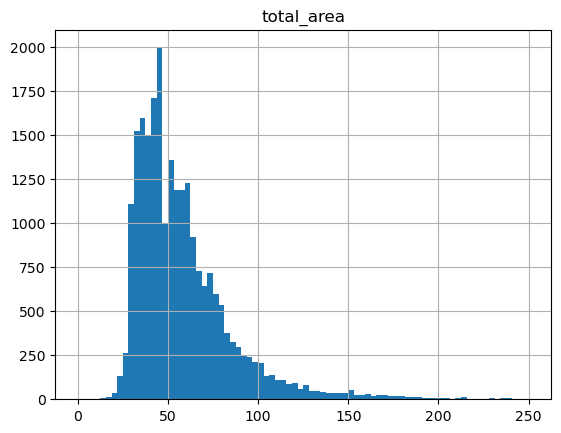

In [49]:
# Построим гистограмму для общей площади
data['total_area'].hist(bins=80, grid = True,  range=(0, 250))
plt.title('total_area')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Распределение значений общей площади близко к нормальному. Наблюдаются локальные шумы и некий аномальный минимум в районе 50 м2, который идентифицируется на гистограммах различной дискретности. Можно предположить о бимодальном распределении, однако пики слишком близки друг к другу. Вероятнее всего это особенность полученной выборки и действительная ситуация с площадью жилья.
    
Также остается довольно длинный хвост с большими значениями площади, которые вероятно могут относится не к квартирам, а коттеджам и домам.
    
Среднее и медиана довольно близки.

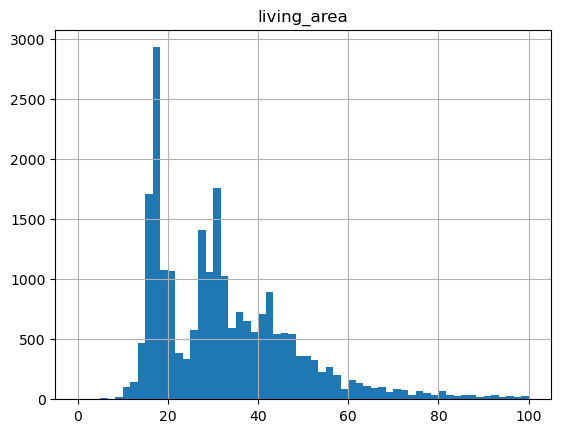

In [50]:
# Построим гистограмму для жилой площади
data['living_area'].hist(bins=60, grid = True,  range=(0, 100))
plt.title('living_area')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
На гистограмме жилой площади площади также наблюдается 2 пика. Учитывая высокую корреляцию между общей и жилой площадью это закономерное явление. Возможно это влияние выборки - данные собраны с множества населенных пунктов, которые относятся к разным типам - деревни, села и крупный город. Соответственно средние площади объектов в городе, вероятно, будут больше, чем в отдаленных поселках и деревнях.
    
Среднее и медиана также довольно близки.

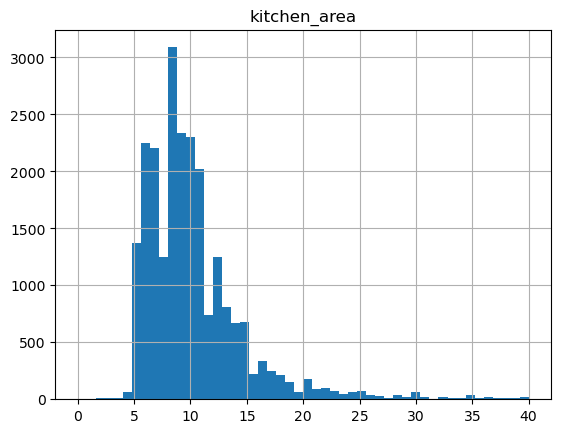

In [51]:
# Построим гистограмму для площади кухни
data['kitchen_area'].hist(bins=50, grid = True,  range=(0, 40))
plt.title('kitchen_area')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
При определенной дискретности можно также идентифицировать 2 пика на гистограмме. На гистограмме также отмечается большой хвост.
    
Среднее и медиана также довольно близки.

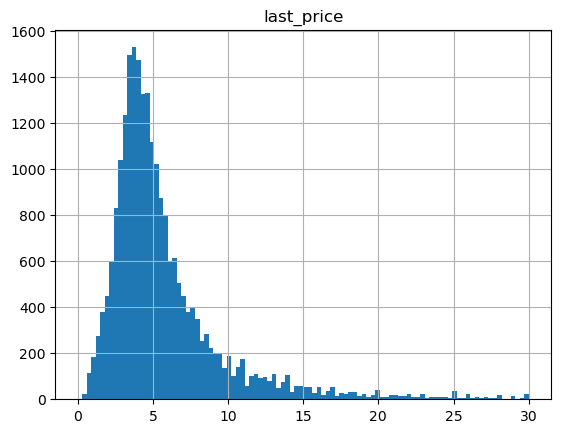

In [52]:
# Построим гистограмму для стоимости объекта
(data['last_price'] / 1000000).hist(bins=100, grid = True,  range=(0, 30))
plt.title('last_price')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Гистограмма распределения стоимости объекта имеет явное нормальное распределение. Глобальных отклонений или закономерностей не видно. Также идентифицируется большой хвост.

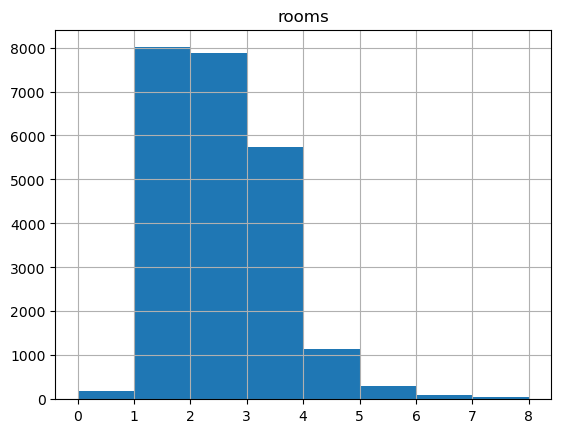

In [53]:
# Построим гистограмму для количетсва комнат
data['rooms'].hist(bins=8, grid = True)
plt.title('rooms')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Распределение количества комнат имеет явное смещение влево - положительную ассиметрию, или логнормальное распределение. Больше всего объектов - однокомнатные квартиры. Также очень близкое количество объявлений о продаже двухкомнатных квартир.

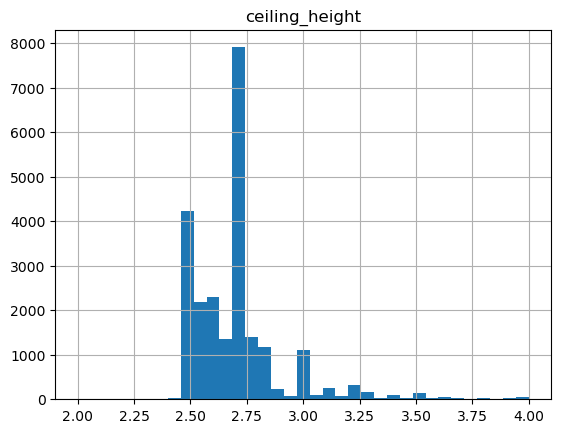

In [54]:
# Построим гистограмму для высоты потолков
data['ceiling_height'].hist(bins=35, grid = True)
plt.title('ceiling_height')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
На гистограмме также прослеживается два пика - в районе 2,5 метров и 2,7 метров. Учитывая, что пропуски заполнялись медианными значениями в зависимости от насленного пункта, это подтверждает гипотезу о влиянии особенностей характеристик в городе и поселках.
    
Распределение получилось довольно сбитым, плотным. Медиана и среднее совпадают.

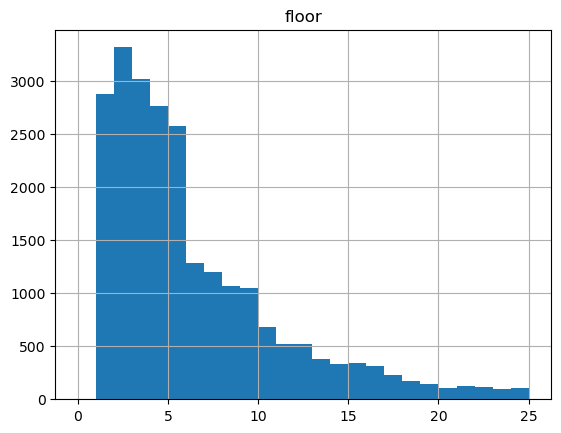

In [55]:
# Построим гистограмму для этажа квартиры
data['floor'].hist(bins=25, grid = True, range=(0, 25))
plt.title('floor')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Наибольшее количество объявлений о продаже квартир не выше 6 этажа. Также есть уникальные предложения в высотках.

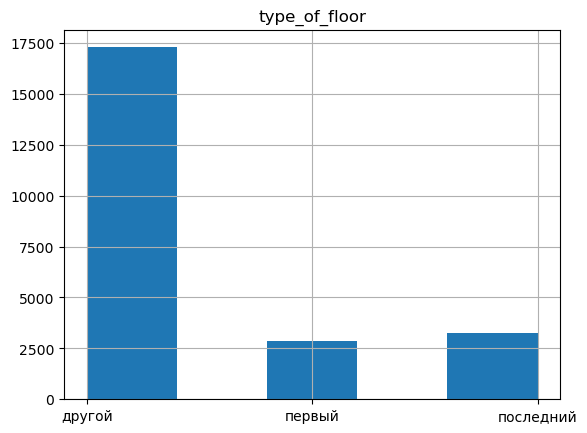

In [56]:
# Построим гистограмму для типа этажа
data['type_of_floor'].hist(bins=5, grid = True)
plt.title('type_of_floor')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Квартиры продаются на разных этажах. Несколько больше объявлений на последних этажах, чем на первых, но суммарно любые другие этажи лидируют по количеству.

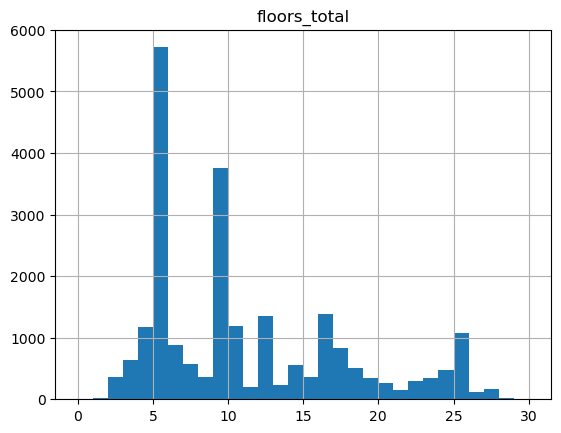

In [57]:
# Построим гистограмму для общего количетсва этажей
data['floors_total'].hist(bins=30, grid = True, range=(0, 30))
plt.title('floors_total')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Больше всего объявлений о продаже квартир в пятиэтажках и девятиэтажках. Причем в данном случае нет явного разделения на город и пригород - пятиэтажки лидируют, а девятиэтажки являются медианой выборки.

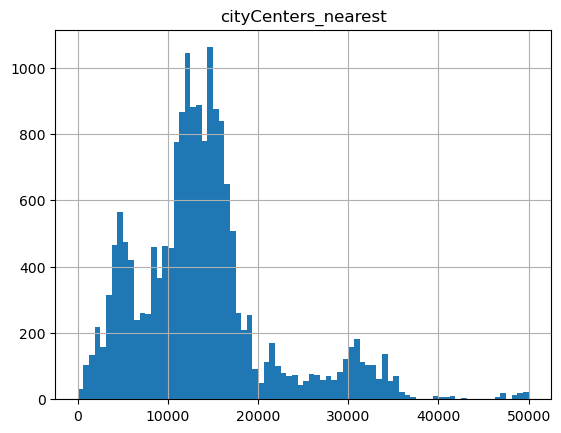

In [58]:
# Построим гистограмму для расстояния до центра города
data['cityCenters_nearest'].hist(bins=80, grid = True, range=(0, 50000))
plt.title('cityCenters_nearest')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Снова 2 пика - малый и большой. Количество объявлений о продаже квартир в Санкт-Петербурге составляет более 15 тысяч. А оставшуюся долю (менее 9 тысяч) составляют объявления из других населенных пунктов. Поэтому средние характеристики Питера превалируют над поселками.
    
В поселках модой является расстояние в районе 5 км, а в городе около 15 км.    

Среднее и медиана выборки довольно близки.

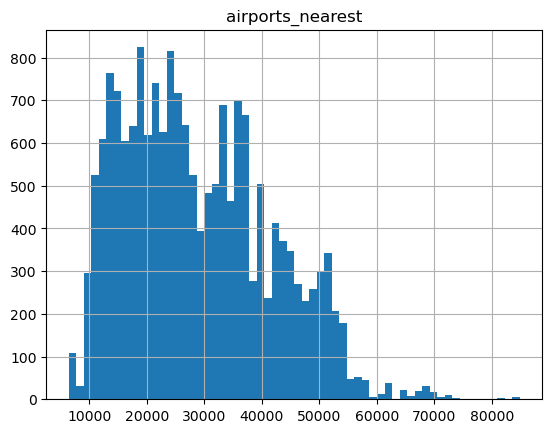

In [59]:
# Построим гистограмму для расстояния до ближайшего аэропорта
data['airports_nearest'].hist(bins=60, grid = True)
plt.title('airports_nearest')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Также наблюдается некое разделение, однако не столь явное - аэропорт удален от города, что компенсируется расстоянием от множества поселков. Также, вероятно, оказывает влияние количество пропусков в данных - было предположение о том, что в части населенных пунктах система работает неккоректно и не собирает статистику.
    
Медиана и среднее очень близки.

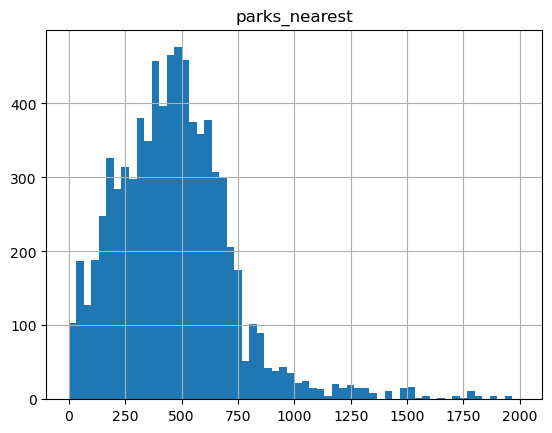

In [60]:
# Построим гистограмму для расстояния до ближайшего парка
data['parks_nearest'].hist(bins=60, grid = True, range=(0, 2000))
plt.title('parks_nearest')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Распределение расстояния до ближайшего парка имеет нормальное распределение. Стоит также учитывать ранее выдвинутую гипотезу о том, что оцениваемое расстояние до парка и водоема ограничено системой, поэтому нет значений свыше определенной границы. Также учитываем пропуски в данных.
    
Медиана и среднее совпали.

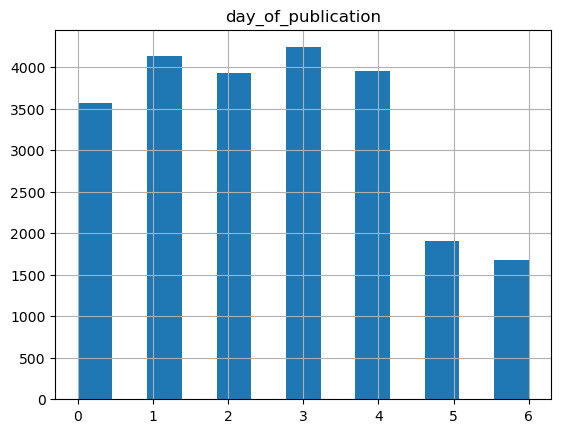

In [61]:
# Построим гистограмму для дня публикации объявлений
data['day_of_publication'].hist(bins=13, grid = True)
plt.title('day_of_publication')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
В данном случае видна закономерность рабочих дней и выходных. Можно предположить, что основная масса объявлений публикуется риэлторами - поэтому большая часть публикаций выполнена в будние дни. А в выходные дни публикуют объявления в основном владельцы недвижимости, как раз в свободное от своей работы время.
    
Это может служить дополнительным подтверждением пропусков в данных, которые вносят пользователи - риэлторы не знают детальных подробностей о количестве этажей в доме, высоты потолков и тд, и поэтому оставляют данные позиции без заполнения.

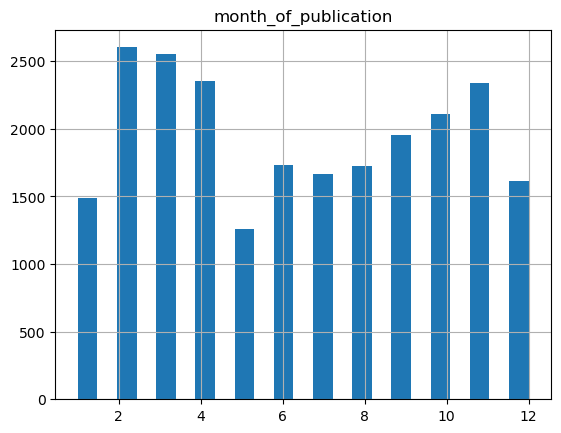

In [62]:
# Построим гистограмму для месяца публикации объявлений
data['month_of_publication'].hist(bins=23, grid = True)
plt.title('month_of_publication')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Больше всего объявлений публикуют в феврале и ноябре месяце. А нименее продуктивный месяц это май. Также в январе и декабре наблюдается малое количество публикаций. Данную закономерность можно связать с количеством выходных и праздничных дней в январе и мае, и предновогодними заботами в декабре.

<div style="border:solid Green 2px; padding: 20px">

**Вывод:** Полученные гистограммы во многом подтвердили ранее выдвинутые гипотезы. Также были обнаружены другие закономерности:
    
    1. В выборке наблюдается 2 глобальные группы - город и другие населенные пункты вокруг города. В каждой группе определяется своя мода и свои характеристики. В дальнейшем возможно рассмотрет анализ, разделив данные категории, чтобы окончательно подтвержить гипотезу и изучить данные.
    2. На основании дня и месяца публикации подтвердилась гипотеза о большой составляющей количества объявлений от риэлторов - в выходные и праздничные дни объявлений меньше, чем в трудовые будни.
    
В целом гистограммы показали адекватное распределение. Основной погрешностью, с которой потенциально можно работать являются длинные хвосты.

#### Анализ скорости продажи

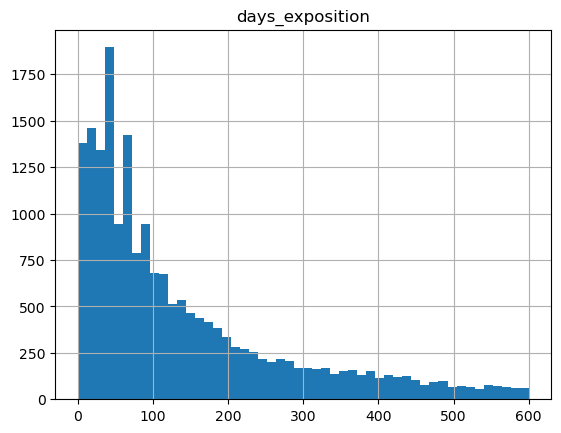

In [63]:
# Построим гистограмму для количества дней публикации объявлений
data['days_exposition'].hist(bins=50, grid = True, range=(0, 600))
plt.title('days_exposition')
plt.show()

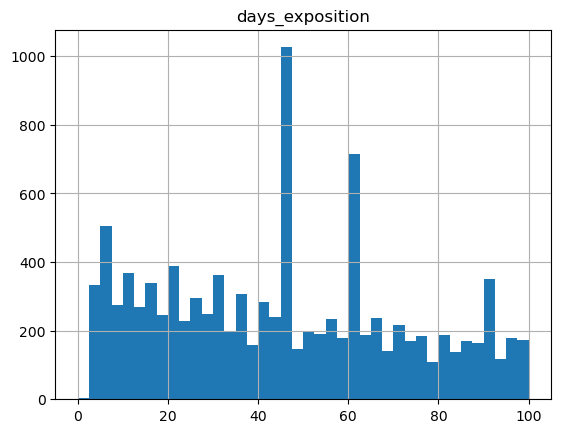

In [64]:
# Детально рассмотрим первые 100 дней продаж
data['days_exposition'].hist(bins=40, grid = True, range=(0, 100))
plt.title('days_exposition')
plt.show()

In [65]:
# Отобразим среднее и медиану
print('Среднее равно:', data['days_exposition'].mean())
print('Медиана равна:', data['days_exposition'].median())

Среднее равно: 180.0564456494947
Медиана равна: 95.0


<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Мода данного распределения около 50 дней. Среднее превышает медиану почти в 2 раза: 180 в сравнении с 95 днями. <br/>
Выкладывая объявление о продаже можно ориентироваться на 2-3 месяца. Максимально объявление было опубликовано 1580 дней, что составляет более 4 лет. Проверив объявления со сроком публикации более 1000 дней, можно сделать вывод, что это не уникальные объекты, а довольно обычные, среднестатистические. Возможно объявление просто забыли своевременно удалить из базы данных...<br/>
Именно такие объявления и увеличивают показатель среднего.
    
Также необходимо учитывать пропуски в данных - 3181 объявление на текущий момент опубликовано.

#### Анализ влияния факторов на стоимость объекта

In [66]:
# Создадим датафрейм только с необходимыми для анализа столбцами
data_analysis = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms',
                      'year_of_publication', 'month_of_publication', 'day_of_publication']]

# Отобразим матрицу корреляции
data_analysis.corr()

,last_price,total_area,living_area,kitchen_area,rooms,year_of_publication,month_of_publication,day_of_publication
last_price,1.000000,0.782151,0.692249,0.611985,0.503870,-0.042508,0.004717,-0.014539
total_area,0.782151,1.000000,0.937935,0.603892,0.774785,-0.077221,0.006910,-0.010466
living_area,0.692249,0.937935,1.000000,0.415573,0.846415,-0.067866,0.002007,-0.008507
kitchen_area,0.611985,0.603892,0.415573,1.000000,0.265228,-0.053073,0.005854,-0.009172
rooms,0.503870,0.774785,0.846415,0.265228,1.000000,-0.051073,-0.002891,-0.005568
year_of_publication,-0.042508,-0.077221,-0.067866,-0.053073,-0.051073,1.000000,-0.270069,-0.004559
month_of_publication,0.004717,0.006910,0.002007,0.005854,-0.002891,-0.270069,1.000000,0.012214
day_of_publication,-0.014539,-0.010466,-0.008507,-0.009172,-0.005568,-0.004559,0.012214,1.000000


<div style="border:solid Green 2px; padding: 20px">
    
Так как в последних 3 столбцах отсутствует линейная зависимость с ценой объекта, выполним построение диаграмм рассеяния только по столбцам total_area, living_area, kitchen_area, rooms	

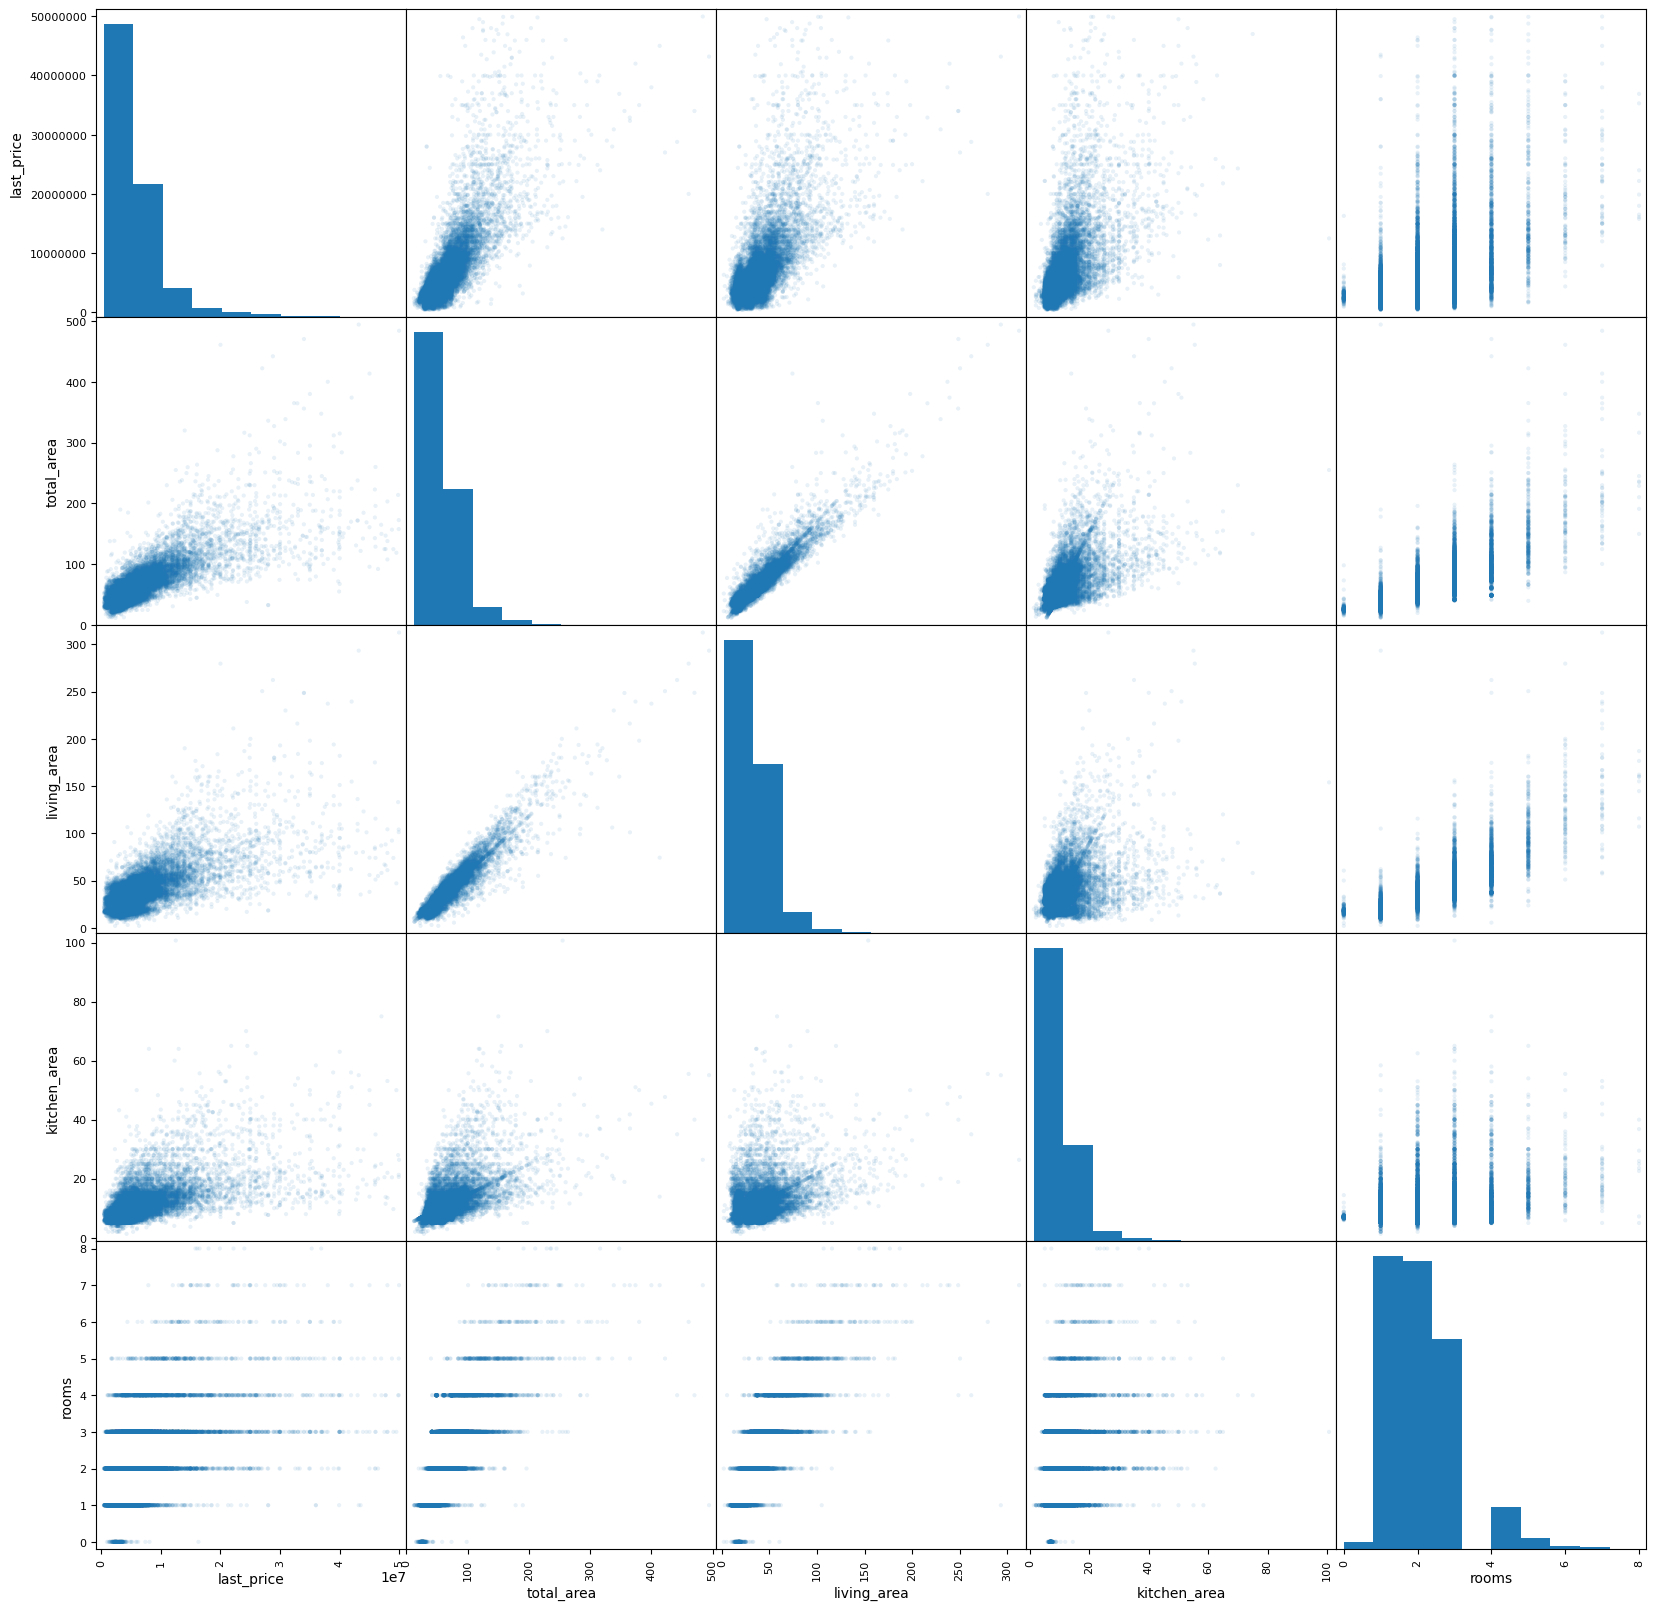

In [67]:
# Создадим датафрейм только с необходимыми для построения диаграмм столбцами
data_analysis = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]

# Сформируем матрицу диаграмм рассеяния, установим прозрачность для точек, чтобы увидеть наибольшую плотность
pd.plotting.scatter_matrix(data_analysis, figsize=(20, 20), alpha=(0.1))
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Рассмотрим матрицу корреляции совместно с матрицей диаграмм рассенияи и сделаем выводы о влиянии параметров на стоимость объекта:
    
**total_area** - характеризуется высокой зависимостью, коэффициент корреляции 0.78, что говорит о наличии довольно тесной связи. На диаграмме рассеяния также отмечается довольно плотное, структурированное облако точек, особенно в 3 квадранте графика.
    
**living_area** - характеризуется также высоким значением коэффициента корреляции 0.69. Также стоит отметить, что жилая площадь имеет очень тесную свзяь с общей площадью (коэффциент корреляции равен 0.94). На матрице рассеяния данные зависимости также просматриваются - облако точек, в сравнении с total_area несколько шире. А зависимость total_area и living_area стремится к линейной.
    
**kitchen_area** - также характеризуется довольно тесной связью со стоимостью объекта, коэффициент корреляции составляет 0.61. На матрице облако имеет наибольшее количество шумов и выбросов, в сравнении с предыдущими данными.
    
**rooms** - так как тесной связи нет, прежде чем делать вывод, также отобразим данные в виде столбчатой диаграммы. 
    
**type_of_floor**, **year_of_publication**, **month_of_publication**, **day_of_publication** - линейная зависимость цены от данных параметров отсутствует. Для детального анализа построим столбчатые диаграммы.

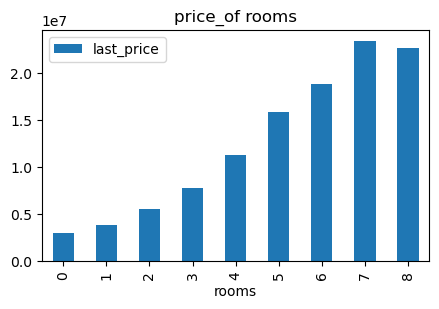

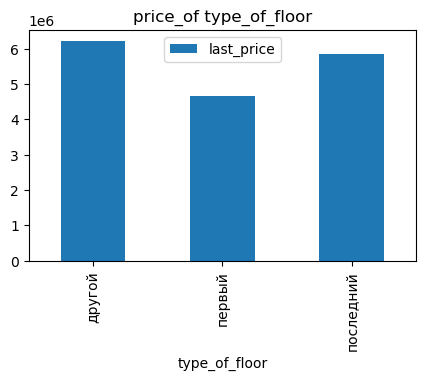

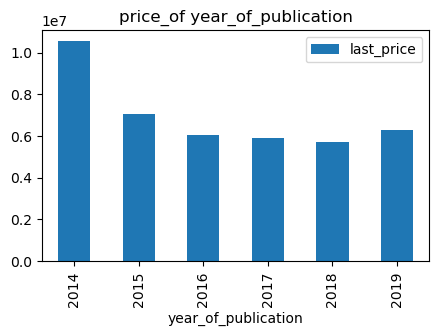

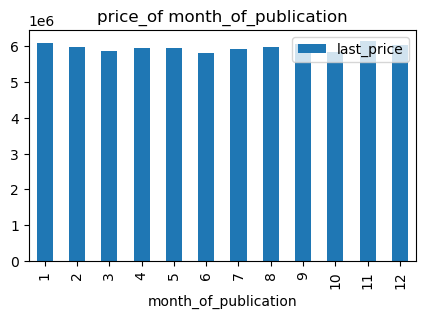

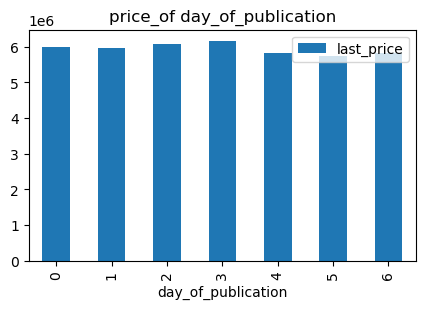

In [80]:
# Создадим список с необходимыми категориальными столбцами
data_analysis_bar = ['rooms','type_of_floor', 'year_of_publication', 'month_of_publication', 'day_of_publication']

# С помощью цикла отобразим столбчатые диаграммы для категориальных данных
for column in data_analysis_bar:
    title = ('price_of ' + column)
    data.pivot_table(index = column, 
                     values = 'last_price').plot(kind = 'bar',
                                                 y = 'last_price', 
                                                 figsize =(5, 3),
                                                 title = title)
    plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
    
**rooms** - по матрице корреляции наблюдается слабая связь с ценой объекта - коэффициент корреляции 0.5. На столбчатой диаграмме наблюдается явный восходящий тренд: чем больше комнат, тем дороже объект. Незначительное отклонение от тренда между 7 и 8 комнат, предположительно можно объяснить точкой перегиба - дальнейшее увеличение количества комнат, удельно уменьшает площадь каждой из них, что не сказывается на росте стоимости объекта.
    
**type_of_floor** - наиболее дорогие объекты расположены на любых этажах, кроме первого и последнего, причем незначительное снижение стоимости последнего этажа можно отнести к погрешности "среднего" и приравнять к стоимости "других" этажей. Наиболее "дешевым" этажом является первый.
    
**year_of_publication** - удивительно, но в 2014 году было зафиксирвоано наибольшее количество объявлений с высокой ценой. Может быть это влияние кризиса? Средняя стоимость превышает 10 млн, в то время как в других годах средняя стоимость не выше 8 млн. В сравнении с 2016-2018, в 2019 году наблюдается небольшой рост, возможно это начало восходящего тренда.
    
**month_of_publication**, **day_of_publication** - как месяц, так и день публикации не оказывает влияния на стоимость объекта.

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Наибольшее влияние на стоимость объекта оказывает общая площадь. Также влияет жилая площадь и площадь кухни, однако данные параметры, глобально, характеризуют один и тот же показатель - площадь, и зависят от общей площади объекта. Такую же аналогию можно провести и с количеством комнат - чем их больше, тем дороже объект.

Также цена зависит и от типа этажа - если квартира расположена на первом этаже, то ее стоимость будет ниже аналогичного объекта на другом, промежуточном этаже.    
    
И довольно явно выдялется 2014 год - зафиксировано наибольшее количество рекордно дорогих объявлений, а вот день и месяц публикации на стоимость никак не влияют.

#### Оценка средней стоимости квадратного метра

In [69]:
# Создадим сводную таблицу, сгруппировав объявления по населнным пунктам и 
# вычислим количество объявлений и среднюю цену квадратного метра
square_meter_table = data.pivot_table(index = 'locality_name', 
                                      values = 'square_meter_costs', 
                                      aggfunc = ['count', 'mean'])

# Присвоим данным понятные названия столбцов
square_meter_table.columns = ['count_of_ads', 'mean_of_ads']

# Отсортируем данные по убыванию и выведем первые 10 строк
square_meter_table.sort_values(by = 'count_of_ads', ascending = False).head(10)

,count_of_ads,mean_of_ads
locality_name,,
санкт-петербург,15526,112039.180663
мурино,590,86087.512050
кудрово,472,95324.930544
шушары,440,78677.364217
всеволожск,397,68605.572959
пушкин,368,103058.361434
колпино,338,75424.579098
парголово,327,90175.913458
гатчина,307,68746.146763


<div style="border:solid Green 2px; padding: 20px">
    
Таким образом выше представлены 10 населенных пунктов с наибольшей средней стоимостью квадратного метра.

In [70]:
# Определим населенный пункт из ТОП-10 с наибольшим показателем средней стоимости квадртаного метра

square_meter_table.sort_values(by = 'count_of_ads', ascending = False).head(10).head(1)

,count_of_ads,mean_of_ads
locality_name,,
санкт-петербург,15526,112039.180663


In [71]:
# Определим населенный пункт из ТОП-10 с наименьшим показателем средней стоимости квадртаного метра

square_meter_table.sort_values(by = 'count_of_ads', ascending = False).head(10).tail(1)

,count_of_ads,mean_of_ads
locality_name,,
выборг,236,58093.893157


<div style="border:solid Green 2px; padding: 20px">
   
**Вывод:** Санкт - Петербург является лидером по количеству объявлений. Также наиболее дорогой квадратный метр из перечня "ТОП-10" в Санкт - Петербурге, средней стоимостью 112 тысяч рублей, а наиболее дешевый в Выборге, стоимостью 58 тысяч рублей. Разница почти в 2 раза.

#### Доп. анализ стоимости квадратного метра

In [72]:
# Определим абсолютный наибольший показатель стоимости одного квадратного метра и населенный пункт
data.loc[data['square_meter_costs'] == data['square_meter_costs'].max(), ['square_meter_costs', 'locality_name']]

,square_meter_costs,locality_name
4859,848484.848485,санкт-петербург
17172,848484.848485,санкт-петербург


In [73]:
# Определим максимальный средний показатель 
square_meter_table[square_meter_table['mean_of_ads'] == square_meter_table['mean_of_ads'].max()]

,count_of_ads,mean_of_ads
locality_name,,
зеленогорск,24,115122.799198


<div style="border:solid Green 2px; padding: 20px">
    
Населенным пунктом с абсолютным максимальным показателем стоимости одного квадратного метра является **Санкт - Петербург**

Населенным пунктом с максимальным средним показателем является **Зеленогорск**

In [74]:
# Определим абсолютный наименьший показатель стоимости одного квадратного метра и населенный пункт
data.loc[data['square_meter_costs'] == data['square_meter_costs'].min(), ['square_meter_costs', 'locality_name']]

,square_meter_costs,locality_name
4405,9615.384615,сланцы


In [75]:
# Определим минимальный средний показатель 
square_meter_table[square_meter_table['mean_of_ads'] == square_meter_table['mean_of_ads'].min()]

,count_of_ads,mean_of_ads
locality_name,,
вахнова кара,1,11688.311688


<div style="border:solid Green 2px; padding: 20px">
    
Населенным пунктом с абсолютным минимальным показателем стоимости одного квадратного метра являются **Сланцы**

Населенным пунктом с минимальным средним показателем является **Вахнова Кара**

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Таким образом Санкт - Петербург является лидером по количеству объявлений и максимальной абсолютной стоимости одного квадратного метра. Минимальные же показатели зафиксированы в населенных пунктах Сланцы и Вахнова Кара

#### Оценка стоимости в зависимости от удаленности от центра

In [76]:
# Выполним срез датафрейма по населенному пункту со значением Санкт - Петербург 
# и создадим сводную таблицу с группировкой в зависимости от удаленности до центра
spb_center = (
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index = 'cityCenters_nearest_km', 
                 values = 'square_meter_costs')
)

# Выведем полученную таблицу на экран
spb_center

,square_meter_costs
cityCenters_nearest_km,
0.0,196172.050536
1.0,145998.548238
2.0,134314.776061
3.0,118617.748811
4.0,127526.100004
5.0,134705.451941
6.0,140026.063967
7.0,140921.519844
8.0,124296.892680


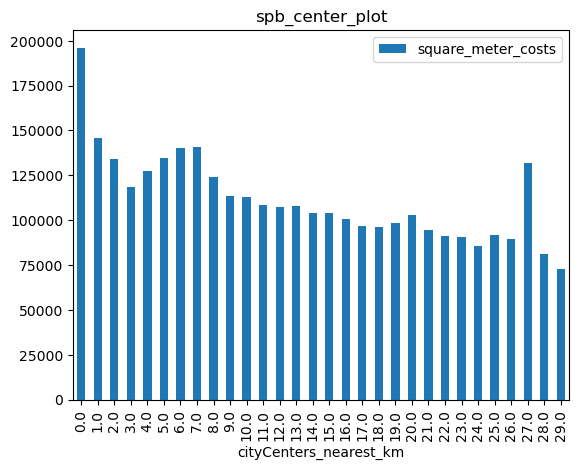

In [77]:
# С целью визуализации данных построим столбчатый график
  
spb_center.plot(kind = 'bar', y = 'square_meter_costs', title = 'spb_center_plot')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** На графике виден явный нисходящий тренд зависимости средней стоимости одного квадратного метра и удаленности от центра города в Санкт - Петербурге. Несколько пиков, которые отличаются от тренда можно аргументировать премиальными районами, находящимися на данном удалении от центра.

### Общий вывод

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** На основании проведенного анализа можно сделать следующие заключения:
    
    1. В данных наблюдается большое влияние и конфликт между двумя глобальными группами - город и населенные пункты. Для проверки данной гипотезы и повышения точности анализа рекомендуется разделить данные группы и оценить полученные результаты. В случае подтверждения гипотезы, в дальнейшем автоматизированная система должна определять по какой из групп оценивать статистику.
    
    2. В среднем квартиры продаются в течение 2-3 месяцев. На данный срок клиент может примерно рассчитывать. Если длительность продажи превышает пол года, это повод задуматься и детально рассмотреть объявление, так как это срок, который превышает статистику. 
    
    3. Больше всего на стоимость объекта недвижимости влияет его площадь - чем она больше, тем дороже объект. Таким образом косвенное влияние оказывает жилая площадь, площадь кухни и количество комнат. Также цена зависит и от типа этажа - если квартира расположена на первом этаже, то ее стоимость будет ниже аналогичного объекта на другом, промежуточном этаже.
    
    4. В зависимости от населенного пункта средняя стоимость квадратного метра очень сильно разнится. Анализруя "ТОП-10" наиболее дорогих населенных пунктов наблюдаются цены от 58 тысяч рублей в Выборге до 112 тысяч рублей в Санкт - Петерубрге. Абсолютным рекордсменом по стоимости можно считать Санкт - Петербург со значением 849 тысяч рублей за один квадратный метр.
    
    5. Также влияние на среднюю стоимость квадратного метра в Санкт - Петербурге оказывает удаленность от центра: в самом центре средняя стоимость одного метра квадратного составит 196172 рублей, в то время как в 30 километров радиусе она снизится  почти в 3 раза до уровня 72953 рублей.


    
**Рекомендации:** В собранных данных было определено довольно большое количество пропусков и аномалий, а также идентифицированы несовершенства системы. В связи с этим сформированы рекомендации по улучшению системы для повышения качетсва анализа:
    
    1. В части населенных пунктов система не собирает данные о парках, удаленности до аэропорта и тд - рекомендуется добавить столбец с булевыми значениями, который будет определять, где данная система работает.
    
    2. В случае отсутствия ближайших парков и водоемов система пропускает значения - рекомендуется изменить данный формат на категории: менее 500 метров, 500-1000 метров и тд, с конечным значением более n метров.
    
    3. Рекомендуется добавить столбец, который будет обозначать снято объявление с публикации, или нет.
    
    4. Рекомендуется добавить столбец с типом населенного пункта, а само название населенного пункта выбирать из выпадающего списка, чтобы не было неявных дубликатов.
    
    5. Рекомендуется интегрировать в систему подсказки для пользователя, на основании среднестатистических данных в районе продаж: после указания адреса, общей площади и количества квартир, система будет предлагать средние данные из этого дома (в случае наличии информации и предыдущих объявлений) или из данного района. Это позволит изначально сократить количество пропусков и повысит точность данных.